In [269]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [424]:
from scipy import signal
from sonar import sonar, utils
import torch

In [270]:
plt.figure(figsize=[5,5])

def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

<Figure size 500x500 with 0 Axes>

In [272]:
showcase1=[]
rad_ = 200
a_masks = []
a_conv = []
rad_cell=50
conveds = []

mat = np.array([create_mat(radius=rad_cell,size=1000)])


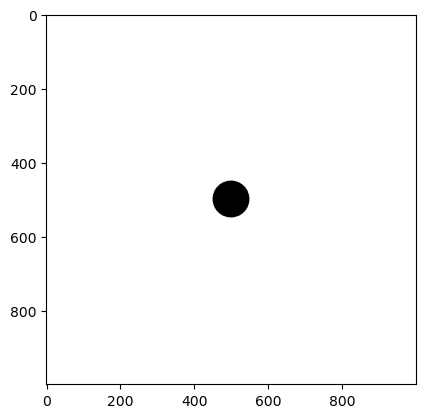

In [273]:
plt.imshow(mat.squeeze(),cmap='Greys')

In [274]:
plt.figure(figsize=[12,3])
kernel_list = []

rad_ = 200
location = 1
for rad in range(0,rad_,10):
    
    # plt.subplot(2,6,location)
    kernel=(create_mat(radius=rad, size=1000)^create_mat(radius=rad-1,size=1000))
    kernel = np.roll(kernel, -110)
    kernel_list.append(kernel)
    location +=1


<Figure size 1200x300 with 0 Axes>

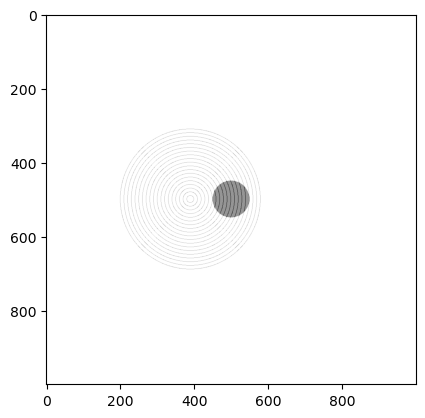

In [275]:
plt.imshow(sum(kernel_list)+mat.squeeze(),cmap='Greys')


In [276]:
arr = sum(kernel_list)+mat.squeeze()

with np.printoptions(threshold=np.inf):
    print(arr)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [277]:
np.count_nonzero(arr)

18982

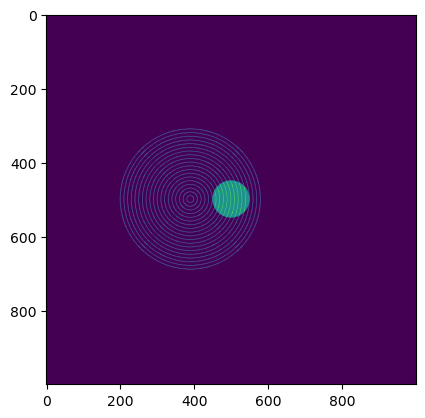

In [278]:
plt.imshow(arr)

In [279]:
np.unique(arr)

array([0, 1, 2])

In [280]:
array1 = sum(kernel_list)
array2 = mat.squeeze()

In [281]:
arr_check = np.logical_and(array1 == 1, array2 == 1)



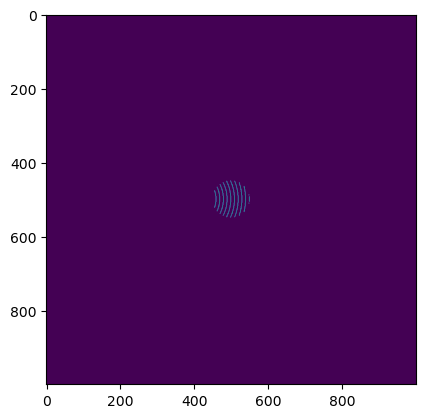

In [282]:
plt.imshow(arr_check)

In [283]:
showcase5_1=[]
showcase5_2=[]
rad_ = 500
rad_cell=30
conveds = []

mat1 = np.roll(create_mat(radius=rad_cell,size=600),-75,1)
mat2 = np.roll(mat1,150,1)
       
mat_total = np.array([mat1, mat2], np.int32)

son = sonar.Sonar(linear_steps=rad_, max_radius=rad_, normalize=True)
#radii, 
co_occurrence_rb = son.co_occurrence_from_tensor(hists=np.array([mat1,mat2]), interpolate=True)

co_occurrence_rb[1,0]


array([ 1.12449565e-08,  2.77196438e-08,  3.91632825e-10,  7.05181027e-09,
        9.16780436e-09,  7.94047278e-09,  9.99793954e-09,  6.05445027e-09,
        1.18610999e-08,  8.87917036e-09,  7.23929996e-09,  1.33167198e-08,
        9.66865936e-09,  3.97592170e-09,  1.08904143e-08,  8.18895779e-09,
        8.25693062e-09,  7.95031320e-09,  4.58838726e-09,  8.40937326e-09,
        6.26203954e-09,  8.16589110e-09,  8.81125800e-09,  6.98306494e-09,
        1.17664250e-08,  7.75139629e-09,  1.10015978e-08,  7.41634140e-09,
        9.79479354e-09,  8.66004903e-09,  9.38844237e-09,  8.11353984e-09,
        8.23743245e-09,  9.05063842e-09,  7.93138362e-09,  8.78704383e-09,
        8.38931292e-09,  8.08241699e-09,  7.33592959e-09,  5.13492186e-09,
        5.11237488e-09,  6.25893157e-09,  5.43890374e-09,  5.65857887e-09,
        5.78879677e-09,  5.82990606e-09,  6.78887046e-09,  4.91823057e-09,
        4.52439846e-09,  5.70495924e-09,  3.77901384e-09,  4.63001562e-09,
        4.76039818e-09,  

In [284]:
kernel_for_conv = co_occurrence_rb[1,0][90:210]

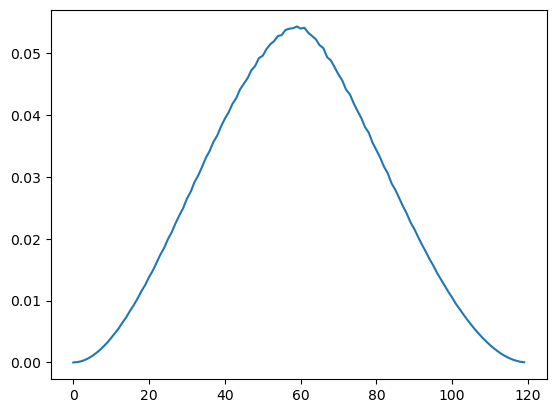

In [285]:
plt.plot(kernel_for_conv)

In [286]:
arrofzeros = np.zeros(600)
# left = np.array(list(range(0,50,5)))
# right = np.array(list(range(50,0,-5)))

In [287]:
arrofzeros[300] = 1

In [288]:
# eg_for_conv = np.concatenate([arrofzeros, left, right, arrofzeros])

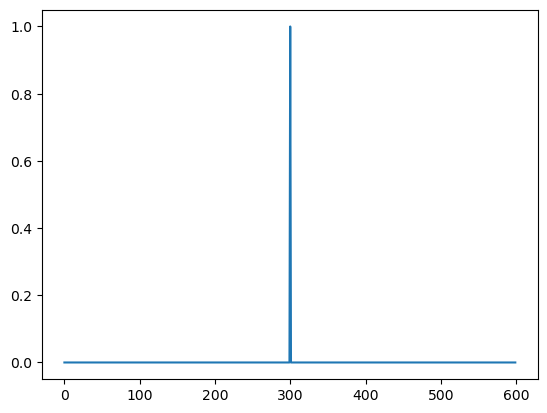

In [289]:
eg_for_conv = arrofzeros
plt.plot(arrofzeros)

In [290]:
conv_res = scipy.signal.convolve(eg_for_conv, kernel_for_conv)


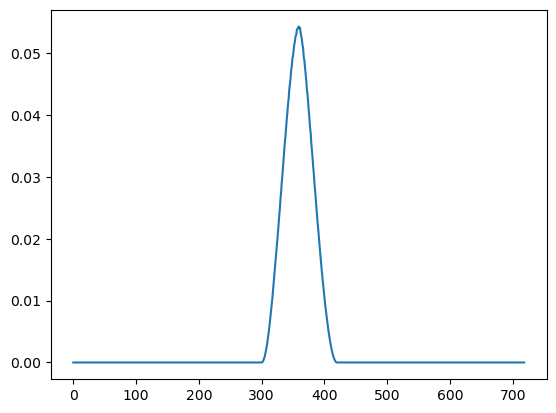

In [291]:
plt.plot(conv_res)

## Add noise to convolution result

In [292]:
conv_res[300] += 0.006

In [293]:
deconv_res = scipy.signal.deconvolve(conv_res, kernel_for_conv)


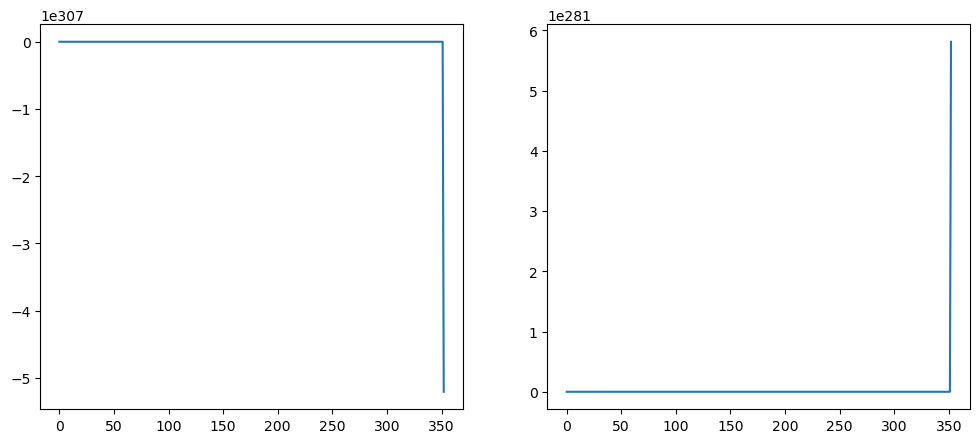

In [294]:
plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(deconv_res[0])

plt.subplot(1,2,2)
plt.plot(deconv_res[1])

/dh-projects/ag-ishaque/analysis/anastasiia/anaconda3/envs/sonar/lib/python3.10/site-packages/scipy/signal/_signaltools.py:1629: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/dh-projects/ag-ishaque/analysis/anastasiia/anaconda3/envs/sonar/lib/python3.10/site-packages/scipy/signal/_signaltools.py:1629: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


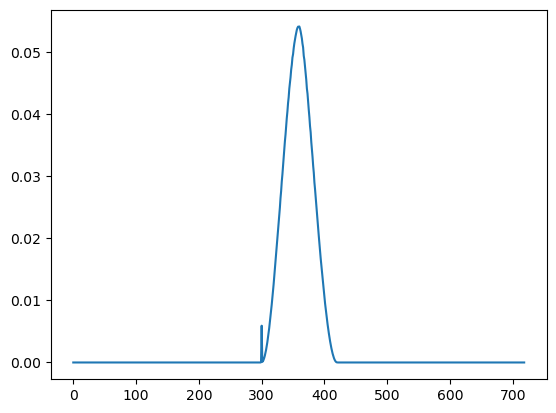

In [295]:
denoising = signal.wiener(conv_res)
plt.plot(denoising)

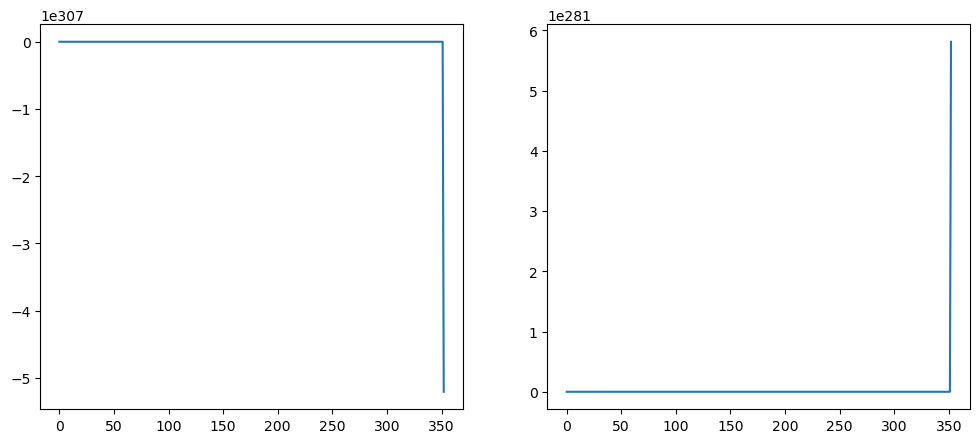

In [296]:
deconv_res = scipy.signal.deconvolve(conv_res, kernel_for_conv)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(deconv_res[0])

plt.subplot(1,2,2)
plt.plot(deconv_res[1])

In [297]:
noise = np.random.random(719)/1000

In [298]:
noisy_curve = conv_res+noise

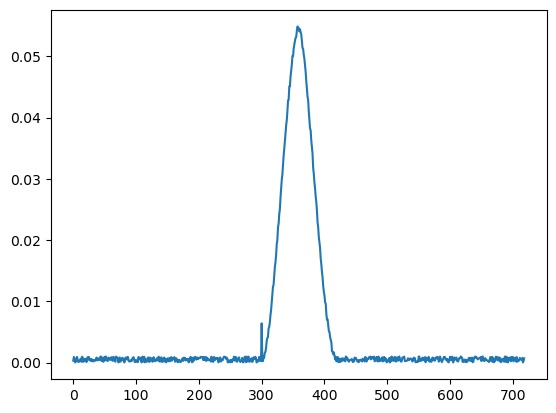

In [299]:
plt.plot(noisy_curve)

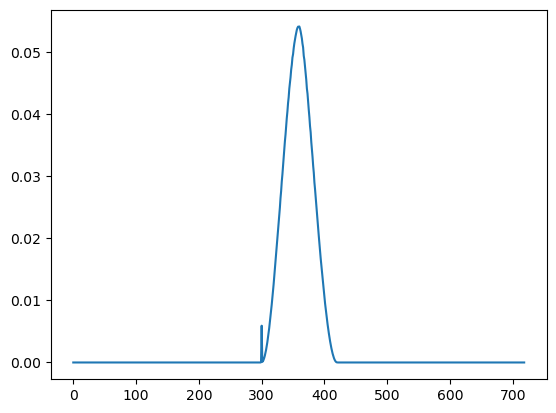

In [300]:
denoising = signal.wiener(conv_res)
plt.plot(denoising)

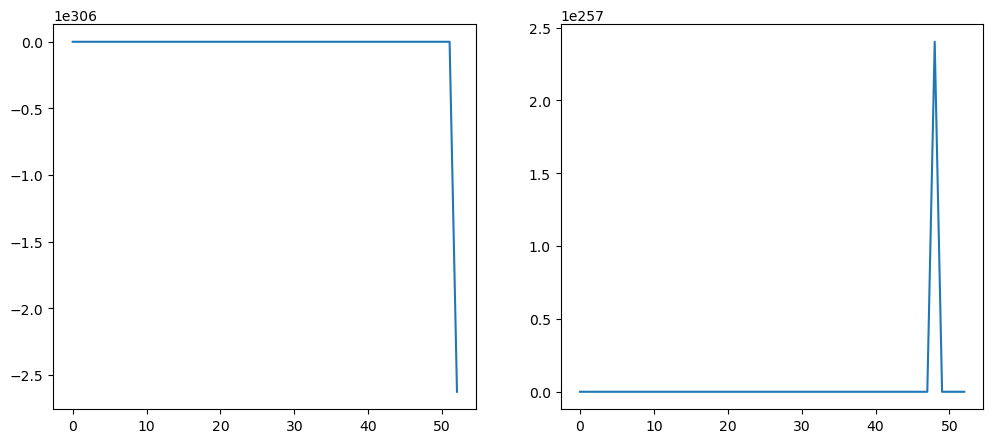

In [301]:
deconv_res = scipy.signal.deconvolve(noisy_curve, kernel_for_conv)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(deconv_res[0])

plt.subplot(1,2,2)
plt.plot(deconv_res[1])

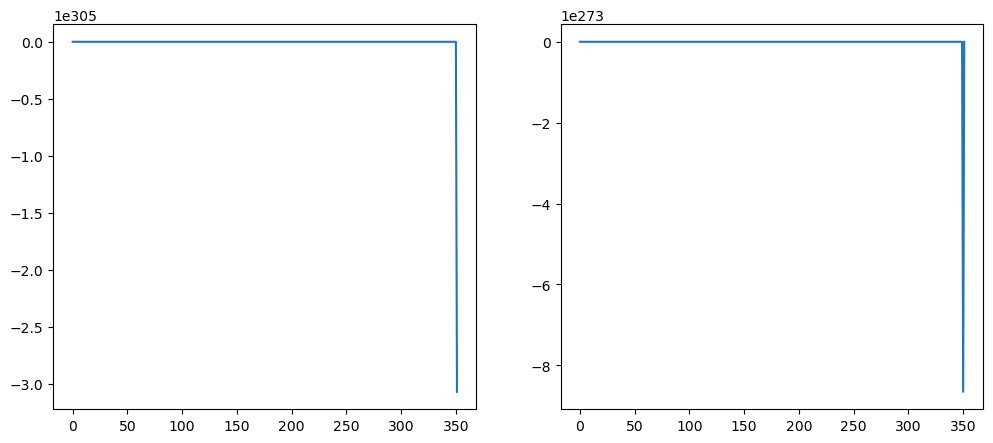

In [302]:
deconv_res = scipy.signal.deconvolve(denoising, kernel_for_conv)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(deconv_res[0])

plt.subplot(1,2,2)
plt.plot(deconv_res[1])

## Adding noise to the raw data

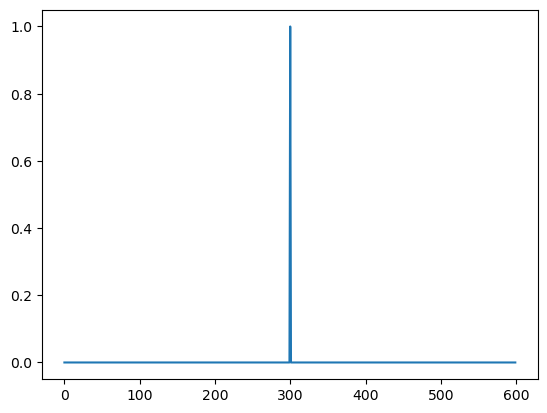

In [303]:
for_convol = np.zeros(600)
for_convol[300] = 1
plt.plot(for_convol)

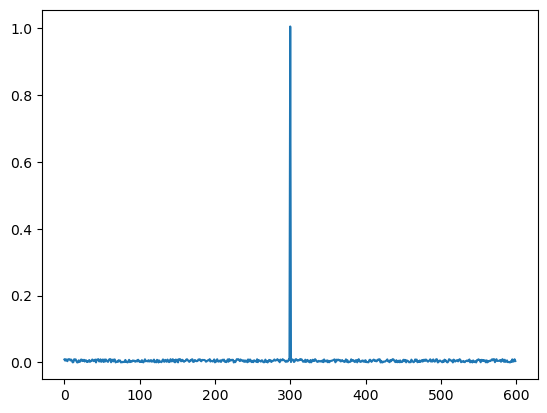

In [304]:
noise = np.random.random(600)/100
noisy_curve = for_convol + noise
plt.plot(noisy_curve)

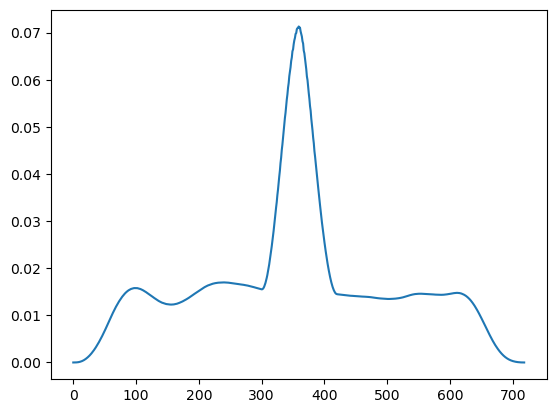

In [305]:
conv_res = scipy.signal.convolve(noisy_curve, kernel_for_conv)
plt.plot(conv_res)

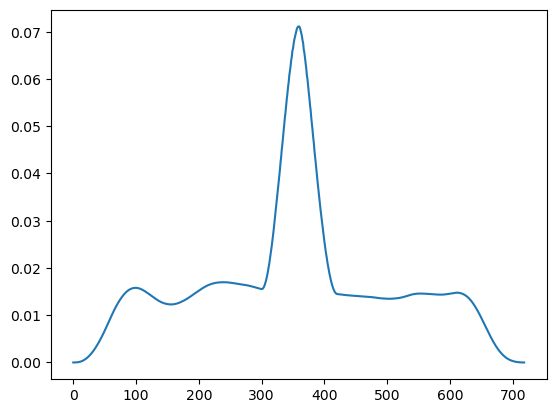

In [306]:
denoising = signal.wiener(conv_res)
plt.plot(denoising)

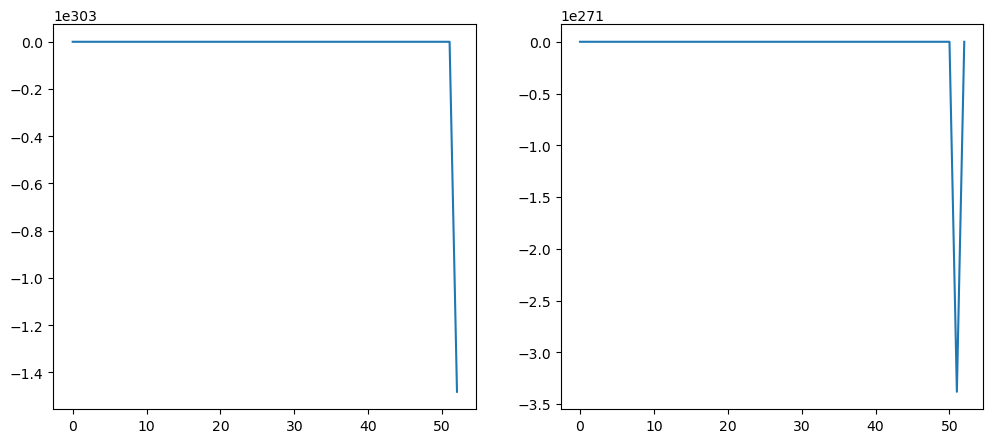

In [307]:
deconv_res = scipy.signal.deconvolve(denoising, kernel_for_conv)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(deconv_res[0])

plt.subplot(1,2,2)
plt.plot(deconv_res[1])

In [308]:
for_convol.shape

(600,)

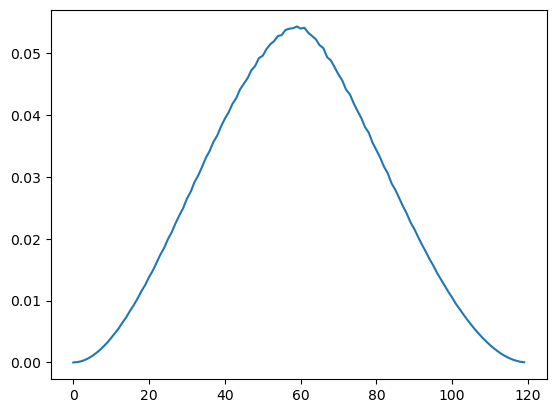

In [309]:
plt.plot(kernel_for_conv)

In [310]:
zerosar = np.zeros(240)

In [311]:
kernel = np.concatenate([zerosar,kernel_for_conv, zerosar])
kernel

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

(0.0, 100.0)

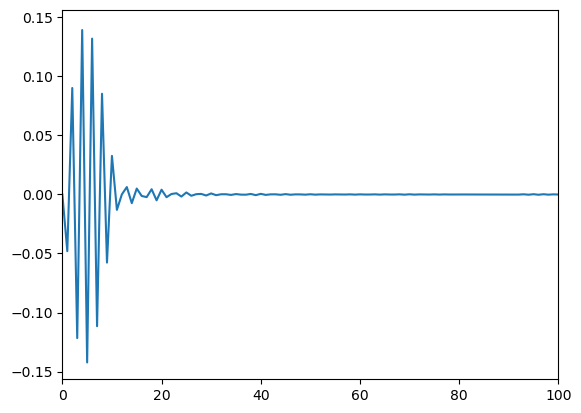

In [312]:
ffttranskern = np.fft.fft(kernel)
plt.plot(ffttranskern.imag)
plt.xlim(0,100)

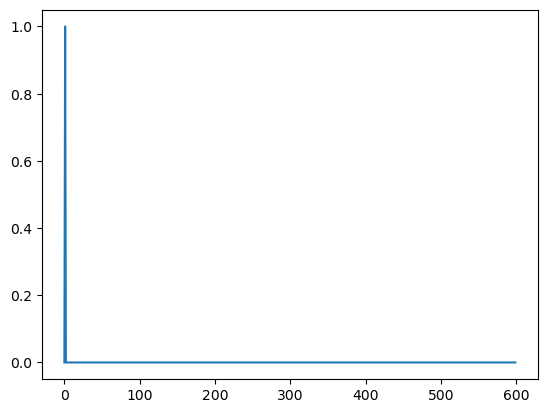

In [313]:
for_convol = np.zeros(600)
for_convol[1] = 1
plt.plot(for_convol)

In [314]:
ffttrans = np.fft.fft(for_convol)

/dh-projects/ag-ishaque/analysis/anastasiia/anaconda3/envs/sonar/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


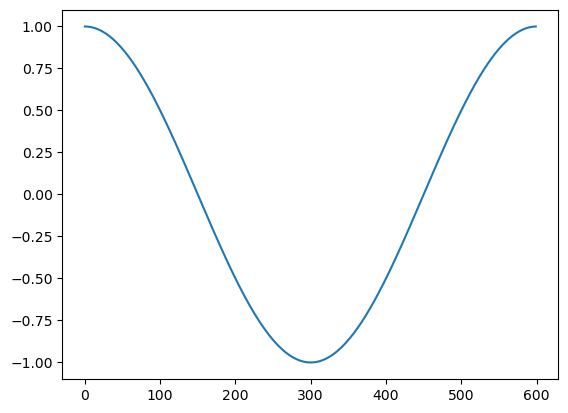

In [315]:
plt.plot(ffttrans)#.imag)
# plt.xlim(0,10)

In [316]:
multipl = ffttrans * ffttranskern

In [317]:
division = ffttrans / ffttranskern

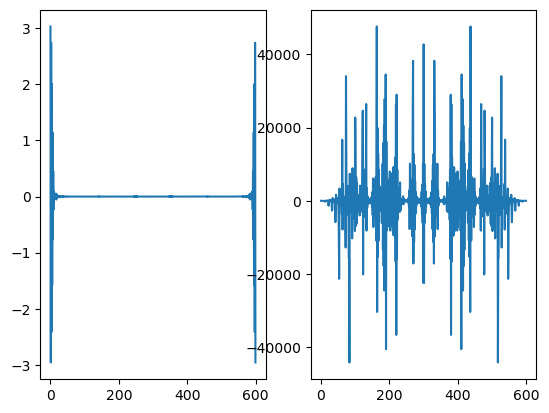

In [318]:
plt.subplot(1,2,1)
plt.plot(multipl)

plt.subplot(1,2,2)
plt.plot(division)

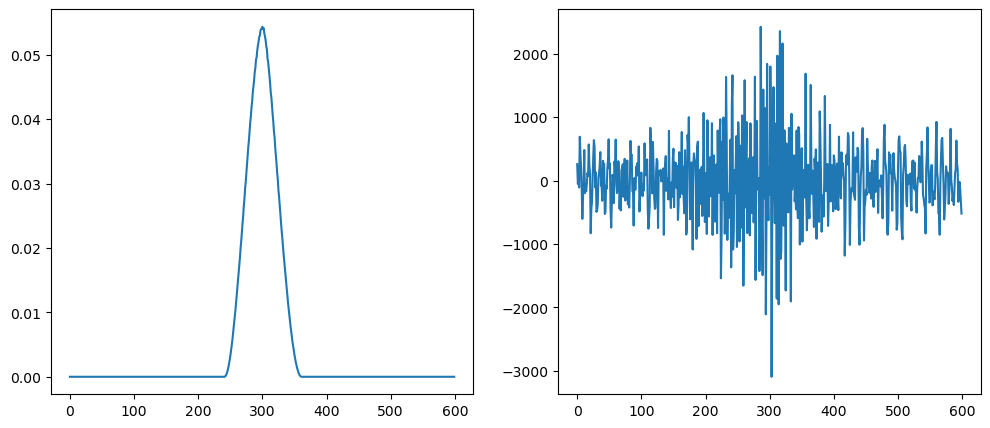

In [319]:
plt.figure(figsize=[12,5])

inv_mult = np.fft.ifft(multipl)
inv_div = np.fft.ifft(division)

plt.subplot(1,2,1)
plt.plot(inv_mult)

plt.subplot(1,2,2)
plt.plot(inv_div)

## Applying fft

In [320]:
""""
replication the model of the cell-cell inter (curve) without/with noise - as a signal

as a kernel - same curve 

perform fft on both

division or multipl = ffttrans(=S) / or * ffttranskern(=H)
or the alternative - Wiener deconvolution


inverse the result of the division to finish deconvolution np.fft.ifft

"""

'"\nreplication the model of the cell-cell inter (curve) without/with noise - as a signal\n\nas a kernel - same curve \n\nperform fft on both\n\ndivision or multipl = ffttrans(=S) / or * ffttranskern(=H)\nor the alternative - Wiener deconvolution\n\n\ninverse the result of the division to finish deconvolution np.fft.ifft\n\n'

In [ ]:
# plt.figure(figsize=[16,5])

showcase5_1=[]
showcase5_2=[]
rad_ = 500
rad_cell=30
conveds = []

mat1 = np.roll(create_mat(radius=rad_cell,size=600),-75,1)
mat2 = np.roll(mat1,300,1)
       
plt.imshow(mat1.astype(int)-mat2,cmap='seismic')

In [ ]:
son = sonar.Sonar(linear_steps=rad_, max_radius=rad_, normalize=True)
#radii, 
co_occurrence_rb = son.co_occurrence_from_tensor(hists=np.array([mat1,mat2]), interpolate=True)


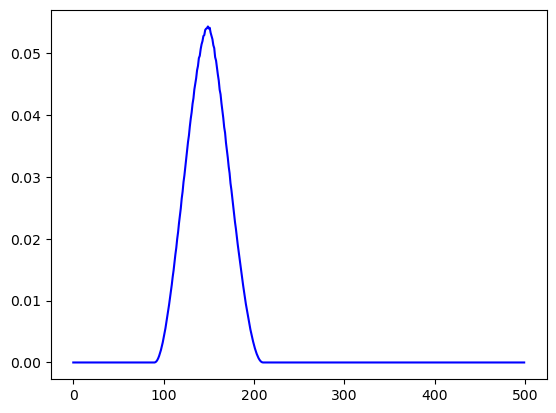

In [ ]:
plt.plot(co_occurrence_rb[1,0], color = 'blue')

### without noise

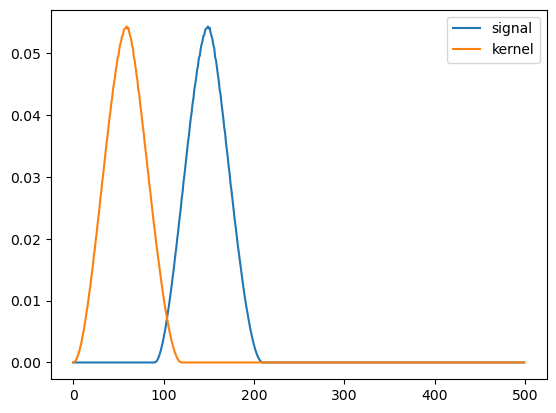

In [324]:
co_oc2dots = co_occurrence_rb[1,0].flatten()
kernel = co_occurrence_rb[1,0].flatten()[90:210]
zer = np.zeros(380)
kernel = np.concatenate([kernel,zer]) # the result looks different when kernel location is shifted. Looks like the model captures kernel instead of the signal, so they should be swapped
kernel = np.roll(kernel, 0)

plt.plot(co_oc2dots, label = "signal")
plt.plot(kernel, label = "kernel")

plt.legend()

In [325]:
co_oc2dots.shape

(500,)

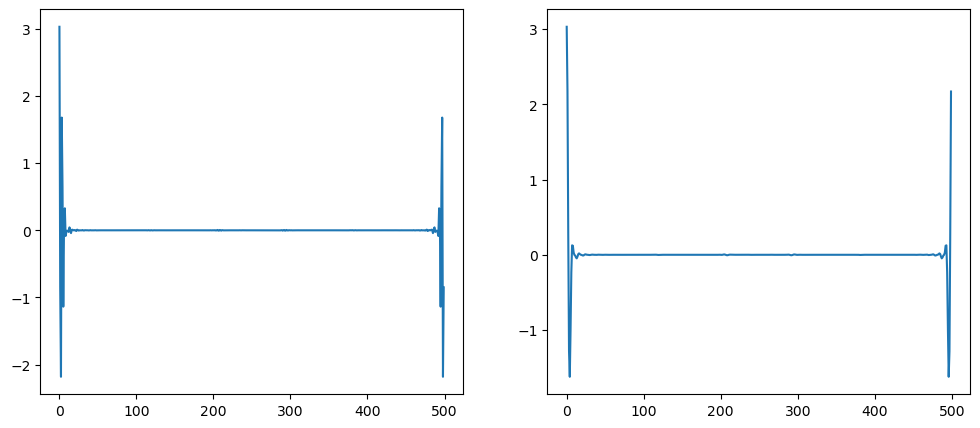

In [326]:
plt.figure(figsize=[12,5])


fft_signal = np.fft.fft(co_oc2dots)
fft_transkern = np.fft.fft(kernel)

plt.subplot(1,2,1)
plt.plot(fft_signal)

plt.subplot(1,2,2)
plt.plot(fft_transkern)
# plt.xlim(0,100)

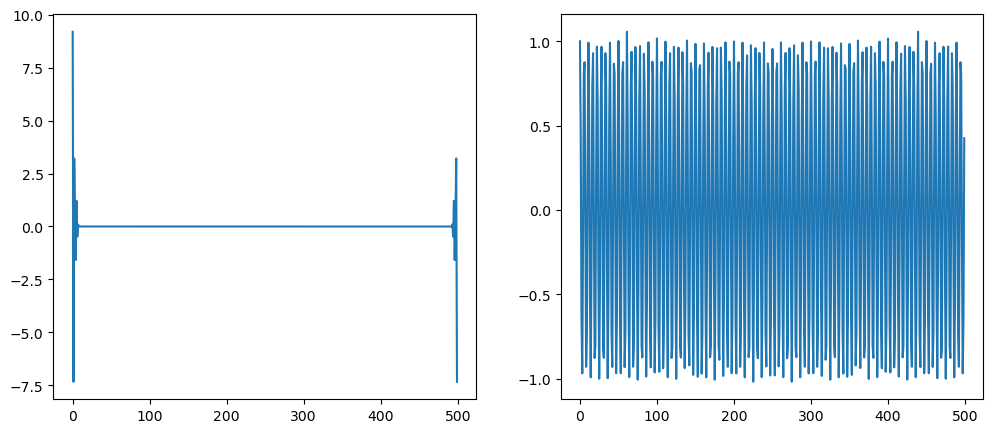

In [327]:
plt.figure(figsize=[12,5])

multipl = fft_signal * fft_transkern 
# multipl = np.roll(multipl,60)

division = fft_signal / fft_transkern 

plt.subplot(1,2,1)
plt.plot(multipl)

plt.subplot(1,2,2)
plt.plot(division)

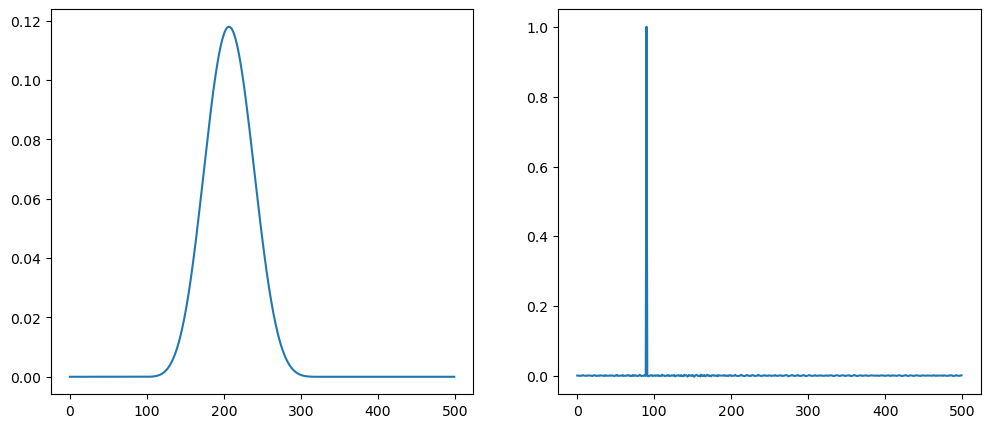

In [328]:
plt.figure(figsize=[12,5])

inv_mult = np.fft.ifft(multipl)
inv_div = np.fft.ifft(division)

plt.subplot(1,2,1)
plt.plot(inv_mult, )

plt.subplot(1,2,2)
plt.plot(inv_div)

## Applying fft full script

Text(0.5, 1.0, 'inversion of the division of the fft')

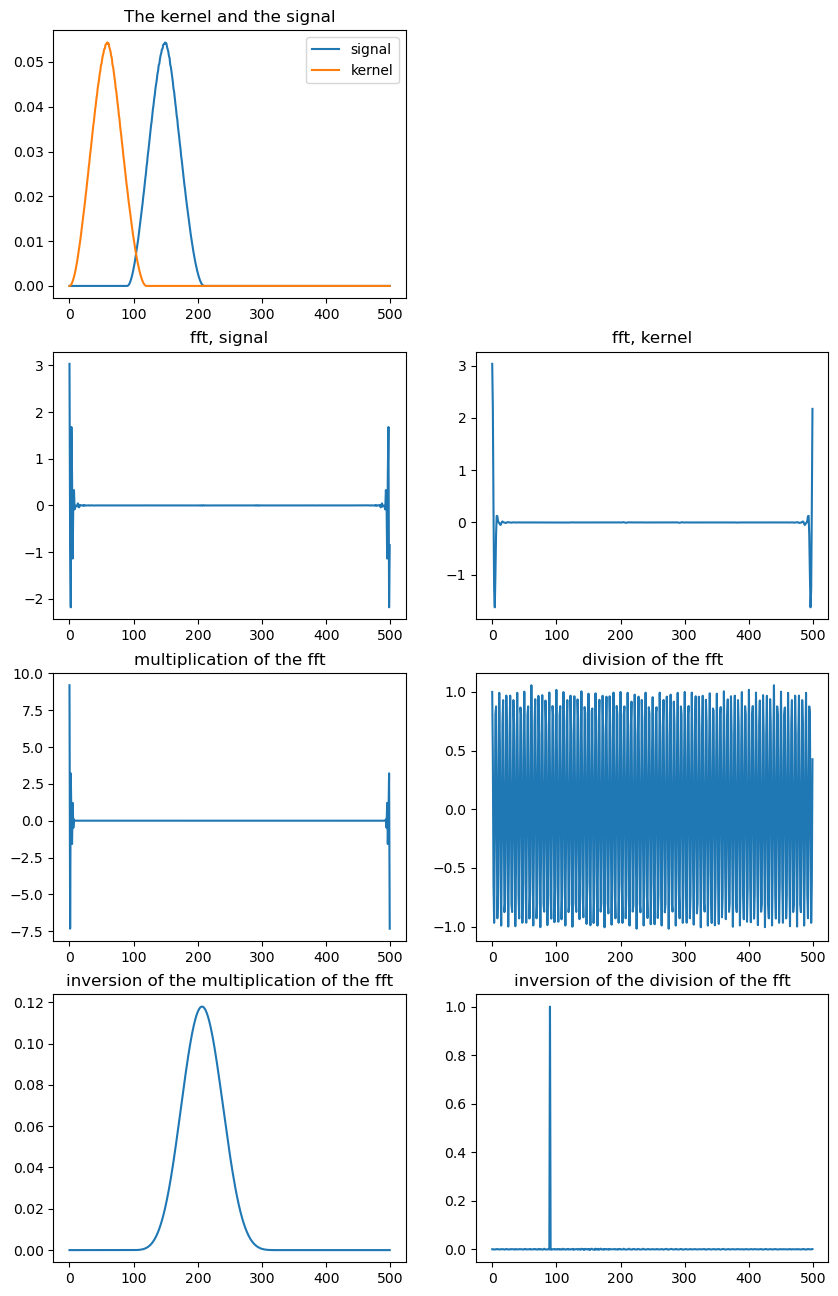

In [329]:
plt.figure(figsize=[10,16])

# defining a signal and a kernel
co_oc2dots = co_occurrence_rb[1,0].flatten()
kernel = co_occurrence_rb[1,0].flatten()[90:210]
zer = np.zeros(380)
kernel = np.concatenate([kernel,zer]) #the result looks different when kernel location is shifted. Looks like the model captures kernel instead of the signal, so they should be swapped
kernel = np.roll(kernel, 0)

plt.subplot(4,2,1)
plt.plot(co_oc2dots, label = "signal")
plt.plot(kernel, label = "kernel")
plt.legend()
plt.title("The kernel and the signal")


# fft of both signal and a kernel
fft_signal = np.fft.fft(co_oc2dots)
fft_transkern = np.fft.fft(kernel)

plt.subplot(4,2,3)
plt.plot(fft_signal)
plt.title("fft, signal")
plt.subplot(4,2,4)
plt.plot(fft_transkern)
# plt.xlim(0,100)
plt.title("fft, kernel")


# multiplication and division of the fft signal and a kernel
multipl = fft_signal * fft_transkern 
# multipl = np.roll(multipl,60)
division = fft_signal / fft_transkern 

plt.subplot(4,2,5)
plt.plot(multipl)
plt.title("multiplication of the fft")
plt.subplot(4,2,6)
plt.plot(division)
plt.title("division of the fft")


# RESULT. inversion of the multiplication and division
inv_mult = np.fft.ifft(multipl)
inv_div = np.fft.ifft(division)

plt.subplot(4,2,7)
plt.plot(inv_mult)
plt.title("inversion of the multiplication of the fft")
plt.subplot(4,2,8)
plt.plot(inv_div)
plt.title("inversion of the division of the fft")

## Applying fft + noise

Text(0.5, 1.0, 'inversion of the division of the fft')

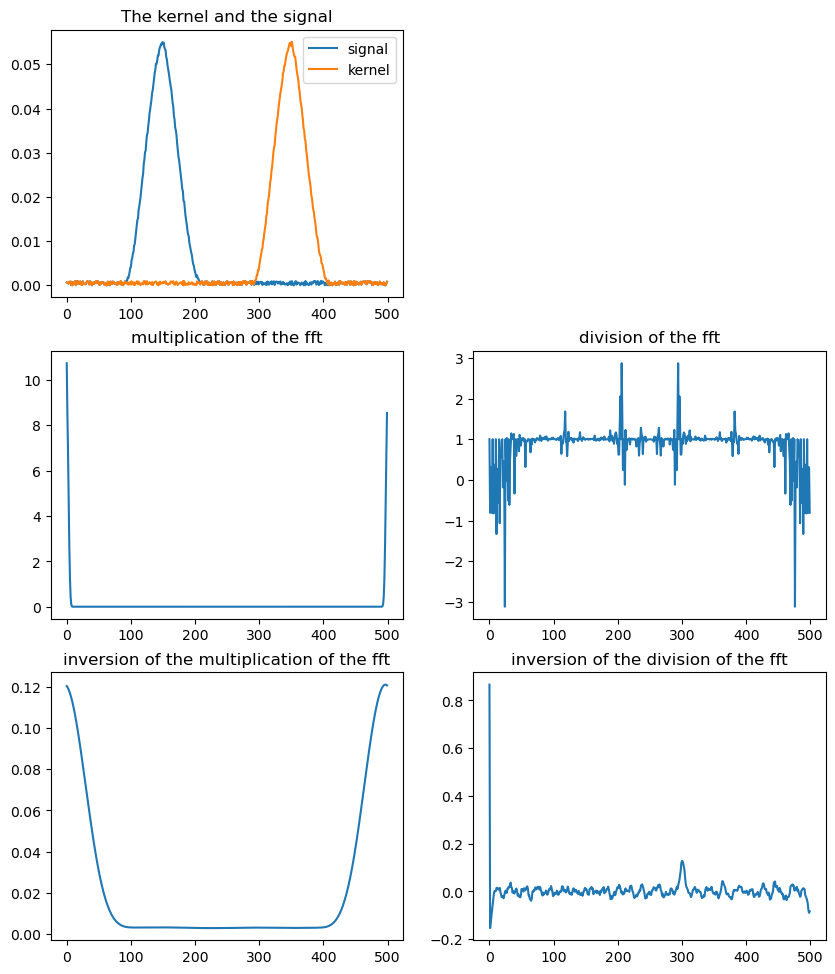

In [330]:
plt.figure(figsize=[10,16])

noise = np.random.random(500)/1000


# defining a signal and a kernel
co_oc2dots = co_occurrence_rb[1,0].flatten() + noise
kernel = np.roll(co_occurrence_rb[1,0].flatten(), 200) + noise

plt.subplot(4,2,1)
plt.plot(co_oc2dots, label = "signal")
plt.plot(kernel, label = "kernel")
plt.legend()
plt.title("The kernel and the signal")


# fft of both signal and a kernel
fft_signal = np.fft.fft(co_oc2dots)
fft_transkern = np.fft.fft(kernel)

# plt.subplot(4,2,3)
# plt.plot(fft_signal)
# plt.title("fft, signal")
# plt.subplot(4,2,4)
# plt.plot(fft_transkern)
# # plt.xlim(0,100)
# plt.title("fft, kernel")


# multiplication and division of the fft signal and a kernel
multipl = fft_signal * fft_transkern 
# multipl = np.roll(multipl,60)
division = fft_signal / fft_transkern 

plt.subplot(4,2,3)
plt.plot(multipl)
plt.title("multiplication of the fft")
plt.subplot(4,2,4)
plt.plot(division)
plt.title("division of the fft")


# RESULT. inversion of the multiplication and division
inv_mult = np.fft.ifft(multipl)
inv_div = np.fft.ifft(division)

# denoising the result
inv_div = signal.wiener(inv_div)

plt.subplot(4,2,5)
plt.plot(inv_mult)
plt.title("inversion of the multiplication of the fft")
plt.subplot(4,2,6)
plt.plot(inv_div)
plt.title("inversion of the division of the fft")

## Applying fft + noise. Weiner alternative

Text(0.5, 1.0, 'inversion of the division of the fft')

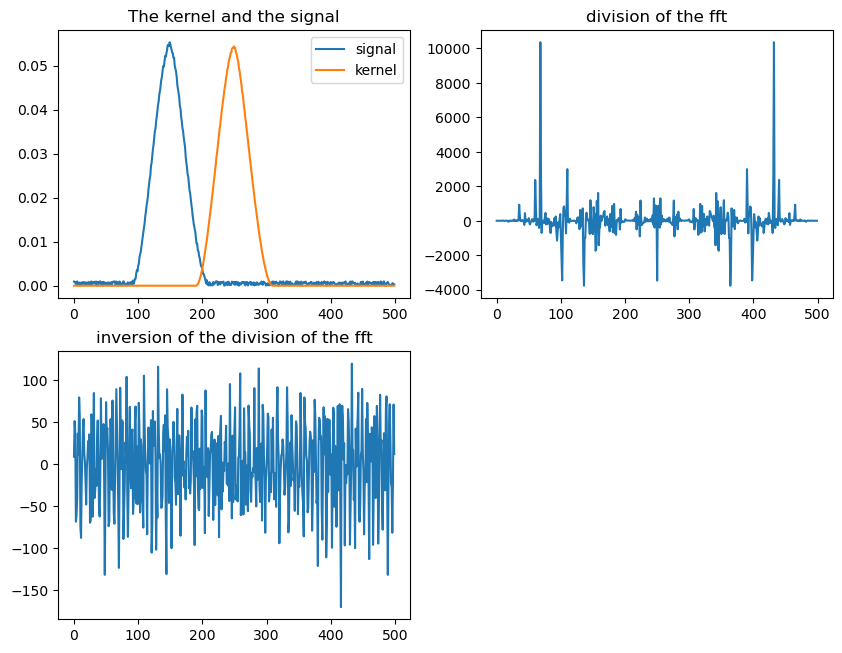

In [343]:
plt.figure(figsize=[10,16])

noise = np.random.random(500)/1000


# defining a signal and a kernel
co_oc2dots = co_occurrence_rb[1,0].flatten() + noise
kernel = np.roll(co_occurrence_rb[1,0].flatten(), 100) 

plt.subplot(4,2,1)
plt.plot(co_oc2dots, label = "signal")
plt.plot(kernel, label = "kernel")
plt.legend()
plt.title("The kernel and the signal")


# fft of both signal and a kernel
fft_signal = np.fft.fft(co_oc2dots)
fft_transkern = np.fft.fft(kernel)

# plt.subplot(4,2,3)
# plt.plot(fft_signal)
# plt.title("fft, signal")
# plt.subplot(4,2,4)
# plt.plot(fft_transkern)
# # plt.xlim(0,100)
# plt.title("fft, kernel")


division = (fft_signal / fft_transkern)/((2.0*np.abs(fft_transkern/len(fft_transkern))**2 )*fft_signal+0.1)

plt.subplot(4,2,2)
plt.plot(division)
plt.title("division of the fft")


# RESULT. inversion of the division

inv_div = np.fft.ifft(division)

# denoising the result
# inv_div = signal.wiener(inv_div)

# plt.subplot(4,2,5)
# plt.plot(inv_mult)
# plt.title("inversion of the multiplication of the fft")
plt.subplot(4,2,3)
plt.plot(inv_div)
plt.title("inversion of the division of the fft")

## Applying fft to the dot matrix

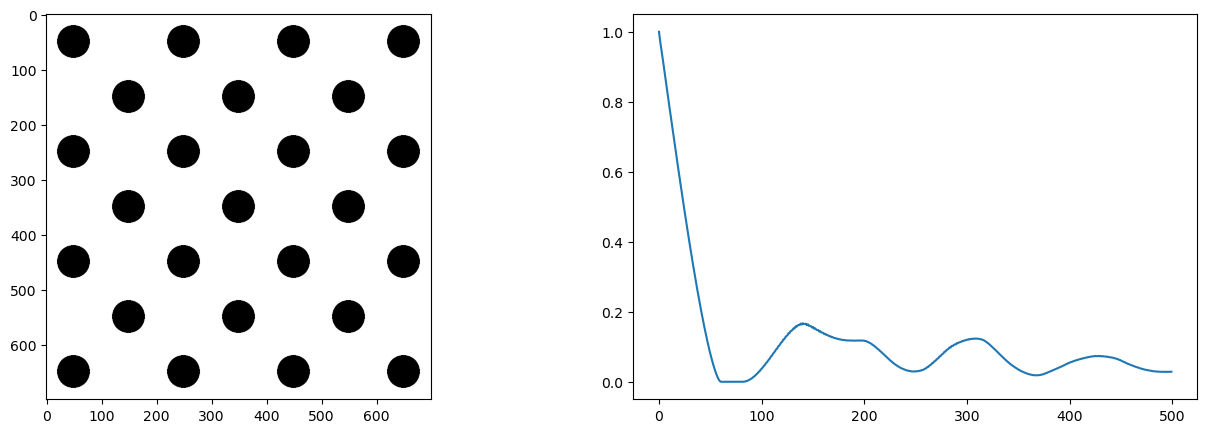

In [397]:
# create a dot matrix

plt.figure(figsize=[16,5])

showcase4=[]
rad_ = 500
rad_cell=30
conveds = []

mat = create_mat(radius=rad_cell,size=1200)

surf = mat.sum()

for i in range(20):
    mat = mat+np.roll(mat,200,0)

mat = mat + np.roll(np.roll(mat,int(100),0),int(100),1)

for i in range(20):
    mat = mat+np.roll(mat,200,1)

mat[:250]=0
mat[-250:]=0
mat[:,:250]=0
mat[:,-250:]=0
    
mat=np.array([mat]) 


son = sonar.Sonar(linear_steps=rad_, max_radius=rad_, normalize=True)
#radii, 
co_occurrence = son.co_occurrence_from_tensor(hists=mat, interpolate=True)
showcase4 = co_occurrence.flatten()


plt.subplot(1,2,1)
plt.imshow(mat.squeeze()[250:-250,250:-250],cmap='Greys')

plt.subplot(1,2,2)
plt.plot(showcase4)

Text(0.5, 1.0, 'inversion of the division of the fft')

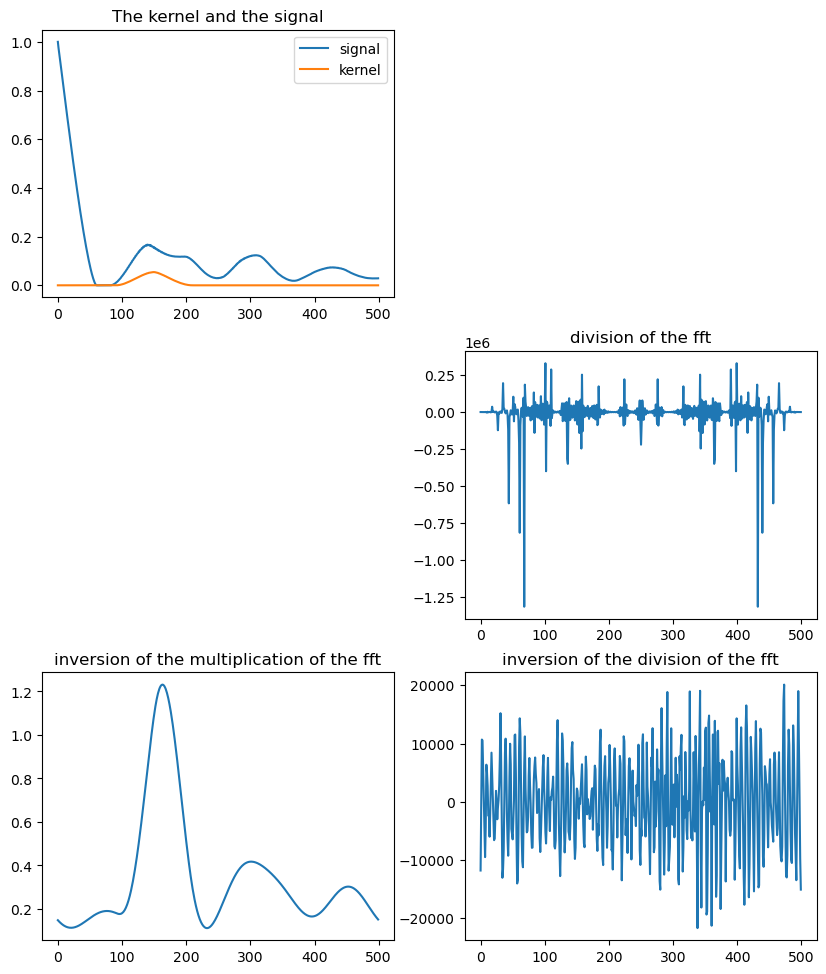

In [333]:
plt.figure(figsize=[10,16])

noise = np.random.random(500)/1000


# defining a signal and a kernel
co_oc2dots = showcase4 #+ noise
kernel = np.roll(co_occurrence_rb[1,0].flatten(), 0) #+ noise

plt.subplot(4,2,1)
plt.plot(co_oc2dots, label = "signal")
plt.plot(kernel, label = "kernel")
plt.legend()
plt.title("The kernel and the signal")


# fft of both signal and a kernel
fft_signal = np.fft.fft(co_oc2dots)
fft_transkern = np.fft.fft(kernel)

# plt.subplot(4,2,3)
# plt.plot(fft_signal)
# plt.title("fft, signal")
# plt.subplot(4,2,4)
# plt.plot(fft_transkern)
# # plt.xlim(0,100)
# plt.title("fft, kernel")


# # multiplication and division of the fft signal and a kernel
multipl = fft_signal * fft_transkern 
# # multipl = np.roll(multipl,60)
# division = fft_signal / fft_transkern 

division = (fft_signal / fft_transkern)/((2.0*np.abs(fft_transkern/len(fft_transkern))**2 )*fft_signal+0.1)

# plt.subplot(4,2,3)
# plt.plot(multipl)
# plt.title("multiplication of the fft")
plt.subplot(4,2,4)
plt.plot(division)
plt.title("division of the fft")


# RESULT. inversion of the multiplication and division
inv_mult = np.fft.ifft(multipl)
inv_div = np.fft.ifft(division)

# denoising the result
# inv_div = signal.wiener(inv_div)

plt.subplot(4,2,5)
plt.plot(inv_mult)
plt.title("inversion of the multiplication of the fft")
plt.subplot(4,2,6)
plt.plot(inv_div)
plt.title("inversion of the division of the fft")

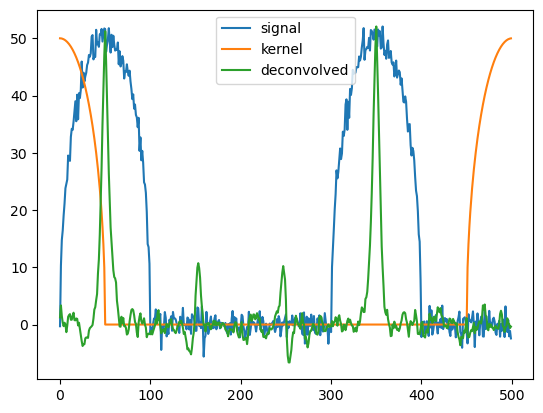

In [344]:
from numpy.fft import fft, ifft

noise_level = 1 # <- added noise to the signal
lambd = 100 # <- regularization parameter for Wiener deconvolution


signal = np.zeros((500,))
signal[0:100]=(-(np.arange(100)-50)**2+50**2)**0.5
kernel = np.roll(signal,-50)

# This adds another 'cell' to the signal: 
signal+=np.random.normal(size=(500,))*noise_level
signal+=np.roll(signal,300)


kernel = np.hstack((kernel, np.zeros(len(signal) - len(kernel)))) # zero pad the kernel to same length
H = fft(kernel)
S = fft(signal)
deconvolved = np.real(ifft(S*np.conj(H)/(H*np.conj(H) + lambd**2))) # <- Wiener deconvolution

plt.plot(signal)
plt.plot(kernel)
plt.plot(deconvolved/deconvolved.max()*signal.max())

plt.legend(['signal','kernel','deconvolved'])

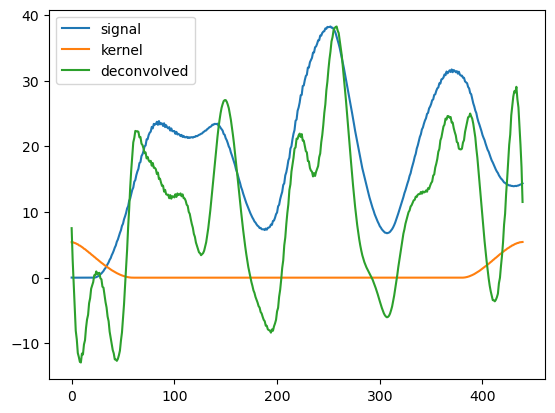

In [421]:
from numpy.fft import fft, ifft

noise_level = 0 # <- added noise to the signal
lambd = 8 # <- regularization parameter for Wiener deconvolution

# extender = np.zeros(20)

signal = showcase4.copy()*np.arange(len(showcase4))
signal = signal[60:]
kernel = np.roll((co_occurrence_rb[1,0].flatten()[60:]*100),-90)

# signal = np.concatenate([extender, signal, extender])
# kernel = np.concatenate([extender, kernel, extender])

# This adds another 'cell' to the signal: 
# signal+=np.random.normal(size=signal.shape)*noise_level
np.arange(len(signal))

kernel = np.hstack((kernel, np.zeros(len(signal) - len(kernel)))) # zero pad the kernel to same length

H = fft(kernel)
S = fft(signal)
deconvolved = np.real(ifft(S*np.conj(H)/(H*np.conj(H) + lambd**2))) # <- Wiener deconvolution

plt.plot(signal)
plt.plot(kernel)
plt.plot(deconvolved/deconvolved.max()*signal.max())

plt.legend(['signal','kernel','deconvolved'])

# Real samples test

In [427]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [428]:
# Define the cluster labels of the pancreas tissue matrix:

cluster_labels = ['background',
 'Acinar-i',
 'Acinar-s',
 'Acinar-REG+',
 'Activated Stellate',
 'Quiescent Stellate',
 'Alpha',
 'Beta',
 'Gamma (PP)',
 'Delta',
 'Ductal',
 'MUC5B+ Ductal (PDG)',
 'MHC Class II',
 'Schwan',
 'B cell',
 'T cell',
# 'Endothelial'
]

In [429]:
n_sample = 1

# Load the pancreas tissue matrix:
tissue_matrix = np.load('/dh-projects/ag-ishaque/analysis/anastasiia/projects/sonar/test/ISS-pancreas/data/sample_matrices.npz')['sample_'+str(n_sample)]

rescaled = utils.rescale_topographic_tensor(tissue_matrix, scaling_factor=0.3).numpy()

In [448]:
original = tissue_matrix.shape
after_scaling = rescaled.shape
scaling_param = original[2]/after_scaling[2]

scaling_param

3.3346137430644474

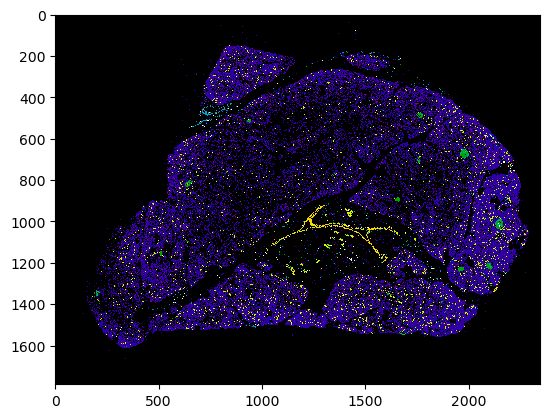

In [430]:
plt.imshow(rescaled.argmax(axis=0),cmap='nipy_spectral',interpolation='none',vmax=len(cluster_labels)-1,alpha=(rescaled.sum(0)!=0).astype(float))

In [431]:
import torch

if torch.cuda.is_available():
    import torch as t
    device = 'cuda:0' # put it in a gpu
else:
    import torch as t
    device='cpu'

In [433]:
rescaled_splitted = np.split(rescaled, 16)

In [434]:
islet_stack = np.add.reduce([rescaled_splitted[6],rescaled_splitted[7],rescaled_splitted[8],rescaled_splitted[9]])

In [514]:
def sig(t, k=1):
    return ((1)/(1+(torch.exp(-t*k))))

def smax(t,k=5):
    return (torch.exp(t*k)/(torch.exp(t*k).sum(0)))

rad_ = 500
lin = 1

son = sonar.Sonar(max_radius=rad_,linear_steps=lin)

cooc_template_ = son.co_occurrence_from_tensor(islet_stack,interpolate=True)

In [ ]:
plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['font.size'] = '16'

plt.plot(cooc_template_[0,0], label = "islets")
plt.title("Inter-islet correlation")
plt.ylim((0,0.02))
plt.xlabel('distance, um')
plt.ylabel('co-occurrence')
plt.legend()
plt.xticks(range(0,int(2100/3.3346137430644474),int(400/3.3346137430644474)), range(0,2001,400))

In [ ]:
showcase5_1=[]
showcase5_2=[]
rad_ = 500
rad_cell=20
conveds = []

mat1 = np.roll(create_mat(radius=rad_cell,size=600),-75,1)
mat2 = np.roll(mat1,150,1)
son = sonar.Sonar(linear_steps=rad_, max_radius=rad_, normalize=True)
#radii, 
co_occurrence_rb = son.co_occurrence_from_tensor(hists=np.array([mat1,mat2]), interpolate=True)

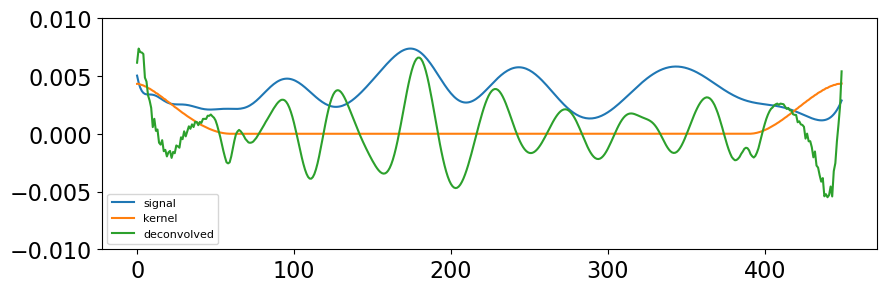

In [ ]:
from numpy.fft import fft, ifft

noise_level = 0 # <- added noise to the signal
lambd = 0.0008 # <- regularization parameter for Wiener deconvolution

# extender = np.zeros(20)

signal = cooc_template_[0,0].copy()
signal = signal[50:]
kernel = np.roll((co_occurrence_rb[1,0].flatten()[50:]*0.07),-100)

# signal = np.concatenate([extender, signal, extender])
# kernel = np.concatenate([extender, kernel, extender])

# This adds another 'cell' to the signal: 
# signal+=np.random.normal(size=signal.shape)*noise_level
# np.arange(len(signal))

kernel = np.hstack((kernel, np.zeros(len(signal) - len(kernel)))) # zero pad the kernel to same length

H = fft(kernel)
S = fft(signal)
deconvolved = np.real(ifft(S*np.conj(H)/(H*np.conj(H) + lambd**2))) # <- Wiener deconvolution

plt.plot(signal)
plt.ylim((-0.01,0.01))

plt.plot(kernel)
plt.plot(deconvolved/deconvolved.max()*signal.max())

plt.legend(['signal','kernel','deconvolved'], fontsize="8")

(0.0, 0.02)

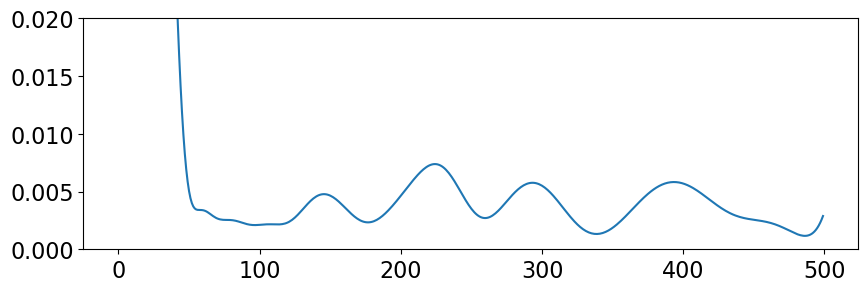

In [ ]:
plt.plot(cooc_template_[0,0])
plt.ylim((0,0.02))